Explained variance ratio (first 10 PCs):
  PC1: 0.2205
  PC2: 0.1440
  PC3: 0.0546
  PC4: 0.0511
  PC5: 0.0406
  PC6: 0.0301
  PC7: 0.0276
  PC8: 0.0232
  PC9: 0.0170
  PC10: 0.0132

Total variance explained by first 50 PCs: 0.8007


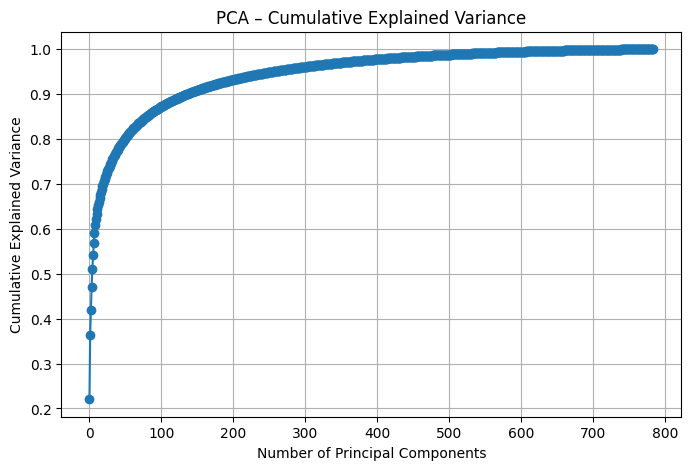

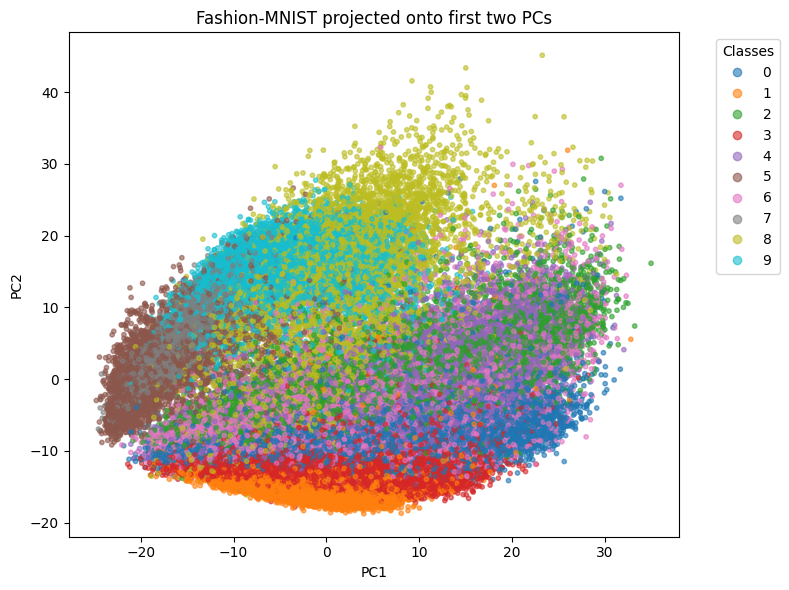

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the dataset
X = np.load('/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1/X_fashion.npy')
y = np.load('/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1/y_fashion.npy')


# Preprocess: flatten images into vectors
if X.ndim == 3:
    n_samples = X.shape[0]
    X_flat = X.reshape(n_samples, -1)
else:
    X_flat = X  # already flat



# Standardize features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)


# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Examine explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance ratio (first 10 PCs):")
for i, var in enumerate(explained_variance[:10], start=1):
    print(f"  PC{i}: {var:.4f}")
print(f"\nTotal variance explained by first 50 PCs: {cumulative_variance[49]:.4f}")



# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Cumulative Explained Variance')
plt.grid(True)
plt.show()


# 2D Scatter of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap='tab10',
    alpha=0.6,
    s=10
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Fashion-MNIST projected onto first two PCs')
plt.legend(
    *scatter.legend_elements(),
    title='Classes',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()
